In [ ]:
# Import csv with twitter data

import pandas as pd, numpy as np, statsmodels.api as sm, seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Data/tw_tweets_users_media_places.csv", index_col='tweet_id')
print(df.shape)

(534, 33)


In [ ]:
# Make new DataFrame with all numeric features

df_reduced = df.select_dtypes(np.number).assign(const=1)
for col in df_reduced:
  print(col)
df_reduced.head()

context_annotations_count
count_annotations
count_cashtags
count_hashtags
count_mentions
count_urls
likes
quotes
referenced_tweet_count
replies
retweets
followers_count
following_count
tweet_count
listed_count
height
width
const


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,likes,quotes,referenced_tweet_count,replies,retweets,followers_count,following_count,tweet_count,listed_count,height,width,const
tweet_id,,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,14,0,0,8,0,2709,4999,96,15,405,813,1
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,7,0,0,0,0,140,735,99,0,2048,1536,1
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,49,1,0,0,20,7510,7260,100,103,288,278,1
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,3,0,0,0,1,7510,7260,100,103,2048,2048,1
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,15,2,0,0,21,7510,7260,100,103,2048,2048,1


In [ ]:
# Set y and X values, drop label, likes, quotes, and replies which we wouldn't know 
# beforehand in order to use in predicting retweets

y = df_reduced.retweets
X = df_reduced
X.drop(columns=['likes', 'quotes', 'replies', 'retweets'], inplace=True)

# Print the model results summary

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.578
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           3.81e-05
Time:                        16:23:56   Log-Likelihood:                -2328.2
No. Observations:                 534   AIC:                             4682.
Df Residuals:                     521   BIC:                             4738.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [ ]:
# Add the predicted values for each record back into the original dataframe

predictions_1 = results.fittedvalues
df['model_1'] = predictions_1
df.head()

,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,quotes,referenced_tweet_count,replies,reply_settings,retweets,source,terms,username,created_at_author,followers_count,following_count,tweet_count,listed_count,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,model_1
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,0,0,8,everyone,0,Twitter for Android,covid%20autism,MacRaeLady,2012-10-27T02:37:45.000Z,2709,4999,96,15,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,6.395809
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,0,0,0,everyone,0,Twitter for iPhone,covid%20autism,zoebarratt1,2014-02-18T21:25:52.000Z,140,735,99,0,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,2.022634
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,1,0,0,everyone,20,Twitter for iPhone,covid-19%20autistic,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,5.030170
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,0,0,0,everyone,1,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,1.159034
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,2,0,0,everyone,21,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,1.159034


In [ ]:
# Calculate the R-squared, R-squared adjusted, RMSE, MAE, and mean of the label column

def mlr_fit(results, actual): 
  import numpy as np

  residuals = np.array(actual) - np.array(results.fittedvalues)
  rmse = np.sqrt(sum((residuals**2))/len(actual))
  
  mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))

  metrics  = "R-squared:\t" + str(round(results.rsquared, 4)) + "\n"
  metrics += "R2-adjusted:\t" + str(round(results.rsquared_adj, 4)) + "\n"
  metrics += "RMSE:\t\t" + str(round(rmse, 4)) + "\n"
  metrics += "MAE:\t\t" + str(round(mae, 4)) + "\n"
  metrics += "Label mean:\t" + str(round(np.mean(actual), 4))

  return metrics

print(mlr_fit(results, df['retweets']))

R-squared:	0.0761
R2-adjusted:	0.0549
RMSE:		18.9346
MAE:		5.1594
Label mean:	3.9007


In [ ]:
# Work on Improving the model fit for more accurate predictions
# Convert the dates into a number by finding the number of days until January 1, 2022

from datetime import datetime
date_string = "2022-1-1"
date = datetime.strptime(date_string, "%Y-%m-%d")
df['new_date'] = date
df['created_at_tweet'] = df['created_at_tweet'].str[:10]
df['created_at_tweet'] = pd.to_datetime(df['created_at_tweet'])
df['created_at_author'] = df['created_at_author'].str[:10]
df['created_at_author'] = pd.to_datetime(df['created_at_author'])

df['created_at_tweet'] = df['new_date'] - df['created_at_tweet']
df['created_at_tweet'] = df['created_at_tweet'] / np.timedelta64(1, 'D')
df['created_at_author'] = df['new_date'] - df['created_at_author']
df['created_at_author'] = df['created_at_author'] / np.timedelta64(1, 'D')
df.drop(columns=['new_date'], inplace=True)
df.head()

,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,quotes,referenced_tweet_count,replies,reply_settings,retweets,source,terms,username,created_at_author,followers_count,following_count,tweet_count,listed_count,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,model_1
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,101.0,en,14,0,0,8,everyone,0,Twitter for Android,covid%20autism,MacRaeLady,3353.0,2709,4999,96,15,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,6.395809
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,104.0,en,7,0,0,0,everyone,0,Twitter for iPhone,covid%20autism,zoebarratt1,2874.0,140,735,99,0,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,2.022634
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,630.0,en,49,1,0,0,everyone,20,Twitter for iPhone,covid-19%20autistic,SteveHardyLDN,3652.0,7510,7260,100,103,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,5.030170
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,625.0,en,3,0,0,0,everyone,1,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,3652.0,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,1.159034
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,628.0,en,15,2,0,0,everyone,21,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,3652.0,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,1.159034


In [ ]:
# Create a new model with the addition of the date columns

df_reduced = df.select_dtypes(np.number).assign(const=1)

y = df_reduced.retweets
X = df_reduced
X.drop(columns=['likes', 'quotes', 'replies', 'retweets'], inplace=True)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.225
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           6.40e-05
Time:                        16:24:05   Log-Likelihood:                -2327.1
No. Observations:                 534   AIC:                             4684.
Df Residuals:                     519   BIC:                             4748.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [ ]:
# Calculate the fit metrics (R-squared, R-squared-adjusted,
# RMSE, MAE, and the label mean for the updated model)

def mlr_fit(results, actual): 
  import numpy as np

  residuals = np.array(actual) - np.array(results.fittedvalues)
  rmse = np.sqrt(sum((residuals**2))/len(actual))
  
  mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))

  metrics  = "R-squared:\t" + str(round(results.rsquared, 4)) + "\n"
  metrics += "R2-adjusted:\t" + str(round(results.rsquared_adj, 4)) + "\n"
  metrics += "RMSE:\t\t" + str(round(rmse, 4)) + "\n"
  metrics += "MAE:\t\t" + str(round(mae, 4)) + "\n"
  metrics += "Label mean:\t" + str(round(np.mean(actual), 4))

  return metrics

print(mlr_fit(results, df['retweets']))

R-squared:	0.08
R2-adjusted:	0.0552
RMSE:		18.8947
MAE:		5.2569
Label mean:	3.9007


In [ ]:
# Improve model by adding categorical features with dummy coding

# Dummy code columns that don't have too many unique values and add them to the 
# original DataFrame, drop the remaining non-numeric features and alternative labels

for col in df:  
   if col == "lang" or col == "reply_settings" or col == "source" or col == "protected" or col == 'verified' or col == 'terms':
     df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)

df = df.select_dtypes(np.number).assign(const=1)
df.drop(columns=['likes', 'quotes', 'replies'], inplace=True)

df.head()

,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,referenced_tweet_count,retweets,created_at_author,followers_count,following_count,tweet_count,listed_count,height,width,model_1,lang_en,lang_es,lang_fr,lang_in,lang_it,lang_tr,lang_und,reply_settings_mentionedUsers,source_Hootsuite Inc.,source_Sprout Social,source_Twitter for Android,source_Twitter for iPad,source_Twitter for iPhone,source_dlvr.it,"terms_""social distancing""%20autistic",terms_corona%20autism,terms_corona%20autistic,terms_coronavirus%20autism,terms_coronavirus%20autistic,"terms_covid%20""sensory overload""","terms_covid%20""sensory processing""",terms_covid%20autism,terms_covid%20autistic,terms_covid-19%20autism,terms_covid-19%20autistic,terms_covid19%20autism,terms_covid19%20autistic,"terms_lockdown%20""sensory overload""",terms_lockdown%20autism,terms_lockdown%20autistic,"terms_pandemic%20""sensory overload""",terms_pandemic%20autism,terms_pandemic%20autistic,"terms_quarantine%20""sensory overload""",terms_quarantine%20autism,terms_quarantine%20autistic,terms_quarantine%20neurotypical,verified_True,const
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,101.0,0,0,3353.0,2709,4999,96,15,405,813,6.395809,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,104.0,0,0,2874.0,140,735,99,0,2048,1536,2.022634,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,630.0,0,20,3652.0,7510,7260,100,103,288,278,5.030170,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,625.0,0,1,3652.0,7510,7260,100,103,2048,2048,1.159034,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,628.0,0,21,3652.0,7510,7260,100,103,2048,2048,1.159034,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Create a new model with the addition of dates and dummy codes

df_reduced3 = df.select_dtypes(np.number).assign(const=1)

y = df_reduced3.retweets
X = df_reduced3
X.drop(columns=['retweets'], inplace=True)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.643
Date:                Wed, 13 Oct 2021   Prob (F-statistic):            0.00436
Time:                        16:24:13   Log-Likelihood:                -2305.7
No. Observations:                 534   AIC:                             4717.
Df Residuals:                     481   BIC:                             4944.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
# Identify insignificant features or those with excessive multi-collinearity
# Calculate VIF score and add to a new DataFrame

def vif(df2):
  import pandas as pd
  from sklearn.linear_model import LinearRegression
  
  # initialize dictionaries
  vif_dict, tolerance_dict = {}, {}

  # form input data for each exogenous variable
  for col in df2.drop(columns=['const']):
    y = df2[col]
    X = df2.drop(columns=[col])
    
    # extract r-squared from the fit
    r_squared = LinearRegression().fit(X, y).score(X, y)

    # calculate VIF
    if r_squared < 1: # Prevent division by zero runtime error
      vif = 1/(1 - r_squared) 
    else:
      vif = 1
    vif_dict[col] = vif

    # calculate tolerance
    tolerance = 1 - r_squared
    tolerance_dict[col] = tolerance

    # generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

  return df_output.sort_values(by=['VIF'], ascending=False)

vif(X)

,VIF,Tolerance
source_Twitter for iPhone,133.680849,0.007481
source_Twitter for Android,128.646692,0.007773
lang_en,21.285836,0.046980
lang_und,13.405972,0.074594
source_Twitter for iPad,12.328201,0.081115
source_Hootsuite Inc.,5.200767,0.192279
terms_covid19%20autism,4.936649,0.202567
terms_covid-19%20autism,4.774171,0.209460
lang_in,4.326643,0.231126
source_dlvr.it,4.273309,0.234011


In [ ]:
# Eliminate features with excessive multi collinearity

# I ran the model and removed the value with the highest p-value until the 
# difference in R squared and R squared adjusted was less than 0.01.
# This removes the features that are not significantly contributing to the model's fit

df_reduced4 = df.select_dtypes(np.number).assign(const=1)

y = df_reduced4.retweets
X = df_reduced4
X.drop(columns=['retweets', 'lang_es', 'count_mentions', 'terms_lockdown%20"sensory overload"', 'terms_quarantine%20neurotypical', 
                'terms_covid19%20autistic', 'terms_pandemic%20"sensory overload"', 'terms_quarantine%20autistic', 'lang_it',
                'terms_covid%20"sensory overload"', 'terms_quarantine%20"sensory overload"', 'terms_"social distancing"%20autistic',
                'terms_corona%20autistic', 'terms_covid%20"sensory processing"', 'source_dlvr.it', 'source_Twitter for iPhone',
                'source_Hootsuite Inc.', 'lang_tr', 'verified_True', 'terms_covid-19%20autistic', 'terms_pandemic%20autistic',
                'terms_covid-19%20autism', 'terms_quarantine%20autism', 'reply_settings_mentionedUsers', 'lang_in',
                'lang_en', 'lang_fr', 'followers_count', 'count_hashtags', 'count_urls', 'referenced_tweet_count', 'lang_und',
                'context_annotations_count', 'terms_corona%20autism', 'count_cashtags', 'tweet_count', 'height', 'width',
                'count_annotations', 'listed_count', 'created_at_author', 'following_count', 'terms_covid%20autistic',
                'terms_lockdown%20autism', 'terms_pandemic%20autism', 'source_Sprout Social', 'source_Twitter for Android',
                'terms_lockdown%20autistic', 'terms_covid%20autism', 'terms_coronavirus%20autistic'], inplace=True)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           2.73e-14
Time:                        16:46:48   Log-Likelihood:                -2312.7
No. Observations:                 534   AIC:                             4637.
Df Residuals:                     528   BIC:                             4663.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
created_at_tweet    

In [ ]:
# Calculate the VIF scores of the new model

def vif(df2):
  import pandas as pd
  from sklearn.linear_model import LinearRegression
  
  # initialize dictionaries
  vif_dict, tolerance_dict = {}, {}

  # form input data for each exogenous variable
  for col in df2.drop(columns=['const']):
    y = df2[col]
    X = df2.drop(columns=[col])
    
    # extract r-squared from the fit
    r_squared = LinearRegression().fit(X, y).score(X, y)

    # calculate VIF
    if r_squared < 1: # Prevent division by zero runtime error
      vif = 1/(1 - r_squared) 
    else:
      vif = 1
    vif_dict[col] = vif

    # calculate tolerance
    tolerance = 1 - r_squared
    tolerance_dict[col] = tolerance

    # generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

  return df_output.sort_values(by=['VIF'], ascending=False)

vif(X)

,VIF,Tolerance
terms_coronavirus%20autism,1.052610,0.950019
terms_covid19%20autism,1.032826,0.968217
created_at_tweet,1.031111,0.969828
model_1,1.006092,0.993945
source_Twitter for iPad,1.002974,0.997035


In [ ]:
# Use MinMax Scaler to normalize the features to the same scale for comparability

from sklearn import preprocessing

df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)
df_minmax.head()

,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,referenced_tweet_count,retweets,created_at_author,followers_count,following_count,tweet_count,listed_count,height,width,model_1,lang_en,lang_es,lang_fr,lang_in,lang_it,lang_tr,lang_und,reply_settings_mentionedUsers,source_Hootsuite Inc.,source_Sprout Social,source_Twitter for Android,source_Twitter for iPad,source_Twitter for iPhone,source_dlvr.it,"terms_""social distancing""%20autistic",terms_corona%20autism,terms_corona%20autistic,terms_coronavirus%20autism,terms_coronavirus%20autistic,"terms_covid%20""sensory overload""","terms_covid%20""sensory processing""",terms_covid%20autism,terms_covid%20autistic,terms_covid-19%20autism,terms_covid-19%20autistic,terms_covid19%20autism,terms_covid19%20autistic,"terms_lockdown%20""sensory overload""",terms_lockdown%20autism,terms_lockdown%20autistic,"terms_pandemic%20""sensory overload""",terms_pandemic%20autism,terms_pandemic%20autistic,"terms_quarantine%20""sensory overload""",terms_quarantine%20autism,terms_quarantine%20autistic,terms_quarantine%20neurotypical,verified_True,const
0,0.04,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.630473,0.004192,0.093301,0.000535,0.003668,0.147887,0.343468,0.166487,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.08,0.5,0.0,0.12,0.0,0.0,0.005300,0.0,0.000000,0.537264,0.000217,0.013718,0.000553,0.000000,0.919249,0.686936,0.100195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.12,0.0,0.0,0.00,0.0,0.0,0.934629,0.0,0.060606,0.688655,0.011620,0.135501,0.000559,0.025190,0.092958,0.089311,0.145786,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.04,0.5,0.0,0.12,0.0,0.5,0.925795,0.0,0.003030,0.688655,0.011620,0.135501,0.000559,0.025190,0.919249,0.930166,0.087104,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.04,0.5,0.0,0.12,0.0,0.5,0.931095,0.0,0.063636,0.688655,0.011620,0.135501,0.000559,0.025190,0.919249,0.930166,0.087104,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create model with the normalized values

y = df_minmax.retweets
X = df_minmax.drop(columns=['retweets', 'lang_es', 'count_mentions', 'terms_lockdown%20"sensory overload"', 'terms_quarantine%20neurotypical', 
                'terms_covid19%20autistic', 'terms_pandemic%20"sensory overload"', 'terms_quarantine%20autistic', 'lang_it',
                'terms_covid%20"sensory overload"', 'terms_quarantine%20"sensory overload"', 'terms_"social distancing"%20autistic',
                'terms_corona%20autistic', 'terms_covid%20"sensory processing"', 'source_dlvr.it', 'source_Twitter for iPhone',
                'source_Hootsuite Inc.', 'lang_tr', 'verified_True', 'terms_covid-19%20autistic', 'terms_pandemic%20autistic',
                'terms_covid-19%20autism', 'terms_quarantine%20autism', 'reply_settings_mentionedUsers', 'lang_in',
                'lang_en', 'lang_fr', 'followers_count', 'count_hashtags', 'count_urls', 'referenced_tweet_count', 'lang_und',
                'context_annotations_count', 'terms_corona%20autism', 'count_cashtags', 'tweet_count', 'height', 'width',
                'count_annotations', 'listed_count', 'created_at_author', 'following_count', 'terms_covid%20autistic',
                'terms_lockdown%20autism', 'terms_pandemic%20autism', 'source_Sprout Social', 'source_Twitter for Android',
                'terms_lockdown%20autistic', 'terms_covid%20autism', 'terms_coronavirus%20autistic']).assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           2.73e-14
Time:                        16:51:43   Log-Likelihood:                 784.06
No. Observations:                 534   AIC:                            -1556.
Df Residuals:                     528   BIC:                            -1530.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
created_at_tweet    

13.297247408656315


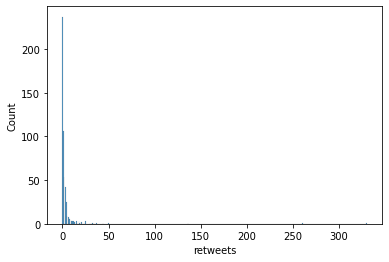

In [ ]:
# Print the skewness of the retweets column and a histplot of retweets

print(df['retweets'].skew())

sns.histplot(df.retweets);

0.5306722282015045


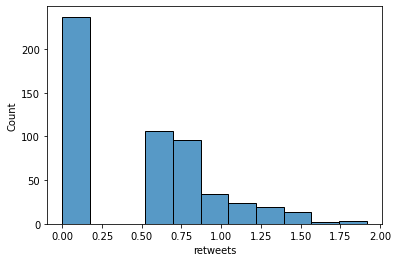

In [ ]:
# Convert the retweets label to a natural log +1 to help with skewness (use the plus 1 
# because retweets has 0 values that will not work with natural log)

df['retweets'] = np.log1p(df['retweets'])
print(df['retweets'].skew())

sns.histplot(df.retweets);

In [ ]:
# Create a new model with the new natural log +1 version of retweets

y = df.retweets
X = df.drop(columns=['retweets', 'lang_es', 'count_mentions', 'terms_lockdown%20"sensory overload"', 'terms_quarantine%20neurotypical', 
                'terms_covid19%20autistic', 'terms_pandemic%20"sensory overload"', 'terms_quarantine%20autistic', 'lang_it',
                'terms_covid%20"sensory overload"', 'terms_quarantine%20"sensory overload"', 'terms_"social distancing"%20autistic',
                'terms_corona%20autistic', 'terms_covid%20"sensory processing"', 'source_dlvr.it', 'source_Twitter for iPhone',
                'source_Hootsuite Inc.', 'lang_tr', 'verified_True', 'terms_covid-19%20autistic', 'terms_pandemic%20autistic',
                'terms_covid-19%20autism', 'terms_quarantine%20autism', 'reply_settings_mentionedUsers', 'lang_in',
                'lang_en', 'lang_fr', 'followers_count', 'count_hashtags', 'count_urls', 'referenced_tweet_count', 'lang_und',
                'context_annotations_count', 'terms_corona%20autism', 'count_cashtags', 'tweet_count', 'height', 'width',
                'count_annotations', 'listed_count', 'created_at_author', 'following_count', 'terms_covid%20autistic',
                'terms_lockdown%20autism', 'terms_pandemic%20autism', 'source_Sprout Social', 'source_Twitter for Android',
                'terms_lockdown%20autistic', 'terms_covid%20autism', 'terms_coronavirus%20autistic']).assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     12.74
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           1.05e-11
Time:                        16:59:08   Log-Likelihood:                -320.97
No. Observations:                 534   AIC:                             653.9
Df Residuals:                     528   BIC:                             679.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
created_at_tweet    